In [1]:
from skimage import io
import numpy as np
import os
import scanpy as sc
import squidpy as sq
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
import os
import gzip
import numpy as np

plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = ['serif']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
def calcQCmat(andata):
    andata.var_names_make_unique()
    andata.var["mt"] = andata.var_names.str.startswith("mt-")
    andata.var["ribo"] = andata.var_names.str.startswith(("RPS", "RPL"))
    andata.var["hb"] = andata.var_names.str.contains("^HB[^(P)]")
    sc.pp.calculate_qc_metrics(andata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True)
    return andata

In [3]:
pathout = "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out"

## Data reading

In [2]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
andata016 = calcQCmat(andata016_)
print(f"{np.shape(andata016.X.todense())}")
sc.pp.filter_cells(andata016, min_counts = 50)
sc.pp.filter_cells(andata016, min_genes = 80)
print(f"{np.shape(andata016.X.todense())}")
andata016 = andata016[andata016.obs["pct_counts_mt"] < 20]
print(f"{np.shape(andata016.X.todense())}")
sc.pp.normalize_total(andata016)
sc.pp.log1p(andata016)


NameError: name 'sc' is not defined

In [1]:
# Save the log1p normalized data
log1p_data = andata016.X.copy()

sc.pp.highly_variable_genes(andata016)
sc.pp.scale(andata016)
andata016.obsm['spatial'] = np.array(andata016.obsm['spatial'], dtype=np.float64)

NameError: name 'andata016' is not defined

<center><h3>Single-Cell Analysis Pipeline (Conventional)

In [20]:
from matplotlib.backends.backend_pdf import PdfPages
# first preform PCA:
sc.tl.pca(andata016, n_comps=50, use_highly_variable=True)
# then insted of using scanpy PCA ploting  
# sc.pl.pca_variance_ratio(andata016, log=True, n_pcs=50)
# creat a custom PCA ploting

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Calculate the variance ratios
pca = andata016.uns['pca']
explained_variance_ratio = np.log(pca['variance_ratio'])


with PdfPages(os.path.join(pathout, f'Principal_Component_VR_16um.pdf')) as pdf:
    # Create your own plot
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12
    
    fig, axs = plt.subplots(1, 1, figsize=(4, 3))

    n_pcs = 50

    # Plot the variance ratios and label the data points
    for i in range(n_pcs):
        x = i+1
        y = explained_variance_ratio[i]
        label = 'PC' + str(x)
        axs.plot(x, y, '')  # plots a blue circle marker
        axs.text(x, y, label, ha='right',fontsize = 4)  # positions text label at data point

    axs.set_xlabel('Principal Component')
    axs.set_ylabel('Variance Ratio')

    # Specify number of ticks on the y-axis
    ax = plt.gca()  # get current axes
    ax.yaxis.set_major_locator(ticker.MaxNLocator(10)) 
    fig.tight_layout()
    pdf.savefig()
    plt.close()

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:374: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_74485/2983688757.py", line 3, in <module>
    sc.tl.pca(andata016, n_comps=50, use_highly_variable=True)
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py", line 194, in pca
    X = _get_obs_rep(adata_comp, layer=layer)
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/get/get.py", line 437, in _get_obs_rep
    return adata.X
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/anndata/_core/anndata.py", line 591, in X
    _subset(self._adata_ref.X, (self._oidx, self._vidx)),
  File "/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/functools.py", line 889, in wrapper
    return dispatch(args[0]._

TypeError: object of type 'NoneType' has no len()

In [46]:
sc.pp.pca(andata016, n_comps=10)
sc.pp.neighbors(andata016)
sc.tl.umap(andata016)
sc.tl.leiden(andata016, key_added="clusters", flavor="igraph", directed=False, n_iterations=2)

In [5]:
andata016.obs['clusters']

s_016um_00052_00082-1     0
s_016um_00150_00268-1     5
s_016um_00144_00175-1     6
s_016um_00165_00109-1     6
s_016um_00297_00147-1    13
                         ..
s_016um_00109_00223-1     0
s_016um_00039_00175-1     5
s_016um_00037_00193-1     9
s_016um_00144_00329-1     1
s_016um_00176_00108-1     6
Name: clusters, Length: 97163, dtype: category
Categories (15, object): ['0', '1', '2', '3', ..., '11', '12', '13', '14']

In [8]:
with PdfPages(os.path.join(pathout, f'Single_Cell_Analysis_Conventional_16um_scatter.pdf')) as pdf:
    # Set the plot parameters
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    # Create the figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Plot the spatial scatter plot on the specified axis
    sq.pl.spatial_scatter(andata016, color="clusters", ax=ax)

    #     # Remove the legend
    #     ax.get_legend().remove()

    # Adjust layout and save to PDF
    #     fig.tight_layout()
    pdf.savefig()
    plt.close()

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


<center><h3> Spatial Information Only 

In [9]:
sq.gr.spatial_neighbors(andata016, n_rings=8, coord_type="grid", n_neighs=10)
#sq.gr.spatial_neighbors(andata016, n_rings=4, coord_type="generic", n_neighs=4, radius= 50, delaunay=True)
andata016.uns['neighbors'] = {
    'connectivities': andata016.obsp['spatial_connectivities'],
    'distances': andata016.obsp['spatial_distances']
}
sc.tl.leiden(andata016, key_added="clusters",flavor="igraph", directed=False, n_iterations=2,resolution=0.5)
andata016.obs['clusters']

s_016um_00052_00082-1    0
s_016um_00150_00268-1    1
s_016um_00144_00175-1    5
s_016um_00165_00109-1    5
s_016um_00297_00147-1    0
                        ..
s_016um_00109_00223-1    1
s_016um_00039_00175-1    2
s_016um_00037_00193-1    2
s_016um_00144_00329-1    2
s_016um_00176_00108-1    5
Name: clusters, Length: 97163, dtype: category
Categories (11, object): ['0', '1', '2', '3', ..., '7', '8', '9', '10']

In [6]:
with PdfPages(os.path.join(pathout, f'Spatial_Information_Only_16um.pdf')) as pdf:
    # Set the plot parameters
    plt.rcParams['figure.dpi'] = 150
    plt.rcParams['font.family'] = ['serif']
    plt.rcParams['font.size'] = 12
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 12
    plt.rcParams['xtick.labelsize'] = 12
    plt.rcParams['ytick.labelsize'] = 12

    # Create the figure and axis
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))

    # Plot the spatial scatter plot on the specified axis
    sq.pl.spatial_scatter(andata016, color="clusters", ax=ax)

    #     # Remove the legend
    #     ax.get_legend().remove()

    # Adjust layout and save to PDF
    #     fig.tight_layout()
    pdf.savefig()
    plt.close()

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)


# Assign cell type labels using a CellTypist built-in model

In [31]:
import celltypist
from celltypist import models

In [32]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
andata016 = calcQCmat(andata016_)
print(f"{np.shape(andata016.X.todense())}")
sc.pp.filter_cells(andata016, min_counts = 50)
sc.pp.filter_cells(andata016, min_genes = 80)
print(f"{np.shape(andata016.X.todense())}")
andata016 = andata016[andata016.obs["pct_counts_mt"] < 20]
print(f"{np.shape(andata016.X.todense())}")
sc.pp.normalize_total(andata016)
sc.pp.log1p(andata016)

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy/lib/python3.10/site-packages/scanpy/readwrite.py:476: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(


(98917, 19059)
(98697, 19059)
(97163, 19059)


In [11]:
models.download_models(force_update = True)

📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 48
📂 Storing models in /home/kanferg/.celltypist/data/models
💾 Downloading model [1/48]: Immune_All_Low.pkl
💾 Downloading model [2/48]: Immune_All_High.pkl
💾 Downloading model [3/48]: Adult_CynomolgusMacaque_Hippocampus.pkl
💾 Downloading model [4/48]: Adult_Human_PancreaticIslet.pkl
💾 Downloading model [5/48]: Adult_Human_Skin.pkl
💾 Downloading model [6/48]: Adult_Mouse_Gut.pkl
💾 Downloading model [7/48]: Adult_Mouse_OlfactoryBulb.pkl
💾 Downloading model [8/48]: Adult_Pig_Hippocampus.pkl
💾 Downloading model [9/48]: Adult_RhesusMacaque_Hippocampus.pkl
💾 Downloading model [10/48]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [11/48]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [12/48]: COVID19_Immune_Landscape.pkl
💾 Downloading model [13/48]: Cells_Adult_Breast.pkl
💾 Downloading model [14/48]: Cells_Fetal_Lung.pkl
💾 Downloading model [15/48]: Cells_Human_Tonsil.pkl


In [47]:
models.models_path
Mouse_Whole_Brain = models.Model.load(model = 'Mouse_Whole_Brain.pkl')
andata016.X = log1p_data
predictions = celltypist.annotate(andata016, model = Mouse_Whole_Brain, majority_voting = True)

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 97163 cells and 19059 genes
🔗 Matching reference genes in the model
🧬 4616 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [48]:
predictions = predictions.to_adata()
andata016.obs["celltypist_cell_label_coarse"] = predictions.obs.loc[
    predictions_Mouse_Whole_Brain.obs.index, "majority_voting"
]

... storing 'feature_types' as categorical
... storing 'genome' as categorical


KeyError: 'Could not find key celltypist_conf_score_coarse in .var_names or .obs.columns.'

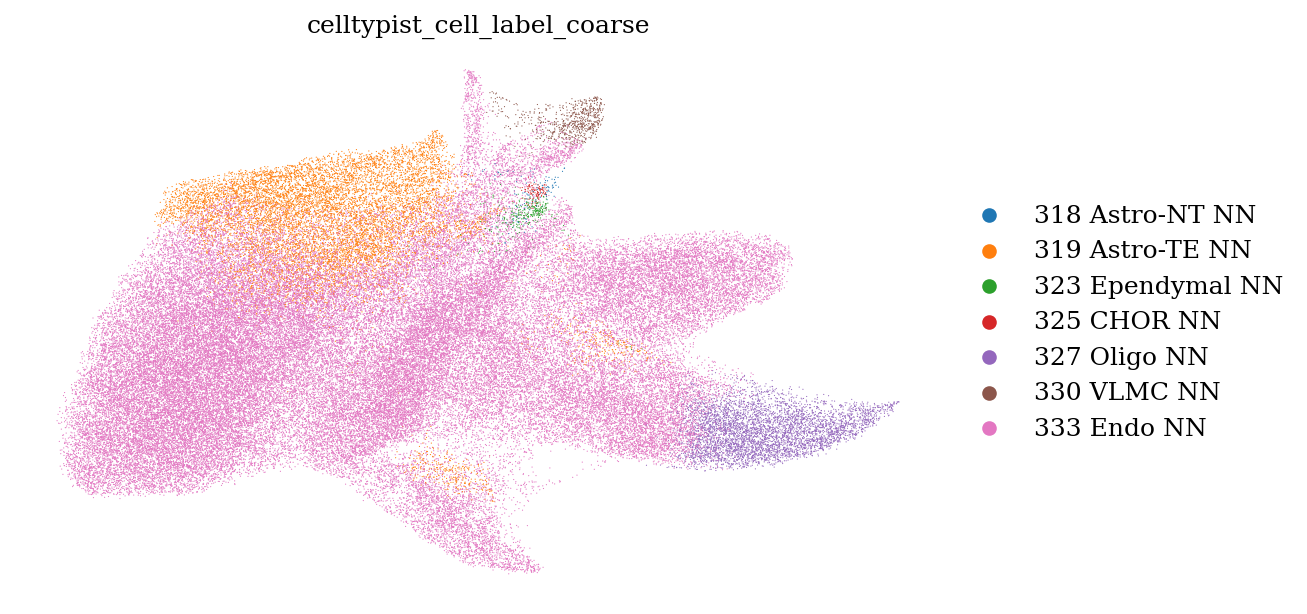

In [49]:
sc.pl.umap(
    andata016,
    color=["celltypist_cell_label_coarse", "celltypist_conf_score_coarse"],
    frameon=False,
    sort_order=False,
    wspace=1,
)

In [34]:
Mouse_Whole_Brain = models.Model.load(model = 'Mouse_Whole_Brain.pkl')
Developing_Mouse_Hippocampus = models.Model.load(model = 'Developing_Mouse_Hippocampus.pkl')


In [38]:
Mouse_Whole_Brain

CellTypist model with 334 cell types and 5596 features
    date: 2024-04-30 17:19:37.721313
    details: cell types from the whole adult mouse brain
    source: https://doi.org/10.1038/s41586-023-06812-z
    version: v1
    cell types: 001 CLA-EPd-CTX Car3 Glut, 002 IT EP-CLA Glut, ..., 338 Lymphoid NN
    features: Xkr4, Rgs20, ..., mt-Cytb

In [41]:
predictions_Mouse_Whole_Brain = celltypist.annotate(
    andata016, model=Mouse_Whole_Brain, majority_voting=True
)
andata016.X = log1p_data
predictions = celltypist.annotate(andata016, model = model, majority_voting = True)

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 97163 cells and 19059 genes
🔗 Matching reference genes in the model
🧬 4616 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Can not detect a neighborhood graph, will construct one before the over-clustering
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [39]:
Mouse_Whole_Brain.cell_types


array(['001 CLA-EPd-CTX Car3 Glut', '002 IT EP-CLA Glut',
       '003 L5/6 IT TPE-ENT Glut', '004 L6 IT CTX Glut',
       '005 L5 IT CTX Glut', '006 L4/5 IT CTX Glut',
       '007 L2/3 IT CTX Glut', '008 L2/3 IT ENT Glut',
       '009 L2/3 IT PIR-ENTl Glut', '010 IT AON-TT-DP Glut',
       '011 L2 IT ENT-po Glut', '012 MEA Slc17a7 Glut',
       '013 COAp Grxcr2 Glut', '014 LA-BLA-BMA-PA Glut',
       '015 ENTmv-PA-COAp Glut', '016 CA1-ProS Glut', '017 CA3 Glut',
       '018 L2 IT PPP-APr Glut', '019 L2/3 IT PPP Glut',
       '020 L2/3 IT RSP Glut', '021 L4 RSP-ACA Glut',
       '022 L5 ET CTX Glut', '023 SUB-ProS Glut', '024 L5 PPP Glut',
       '025 CA2-FC-IG Glut', '026 NLOT Rho Glut', '027 L6b EPd Glut',
       '028 L6b/CT ENT Glut', '029 L6b CTX Glut', '030 L6 CT CTX Glut',
       '031 CT SUB Glut', '032 L5 NP CTX Glut', '033 NP SUB Glut',
       '034 NP PPP Glut', '035 OB Eomes Ms4a15 Glut', '036 HPF CR Glut',
       '037 DG Glut', '038 DG-PIR Ex IMN', '039 OB Meis2 Thsd7b Gaba',


In [42]:
predictions_Mouse_Whole_Brain = predictions_Mouse_Whole_Brain.to_adata()
andata016.obs["celltypist_cell_label_coarse"] = predictions_Mouse_Whole_Brain.obs.loc[
    predictions_Mouse_Whole_Brain.obs.index, "majority_voting"
]

In [43]:
sc.pl.umap(
    andata016,
    color=["celltypist_cell_label_coarse", "celltypist_conf_score_coarse"],
    frameon=False,
    sort_order=False,
    wspace=1,
)

... storing 'feature_types' as categorical
... storing 'genome' as categorical


KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [26]:
# Use the log1p normalized data for CellTypist
andata016.X = log1p_data
predictions = celltypist.annotate(andata016, model = model, majority_voting = True)

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 97163 cells and 19059 genes
🔗 Matching reference genes in the model
🧬 4616 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 20
🗳️ Majority voting the predictions
✅ Majority voting done!


In [27]:
predictions.predicted_labels

,predicted_labels,over_clustering,majority_voting
s_016um_00052_00082-1,338 Lymphoid NN,34,333 Endo NN
s_016um_00150_00268-1,333 Endo NN,49,333 Endo NN
s_016um_00144_00175-1,327 Oligo NN,14,333 Endo NN
s_016um_00165_00109-1,332 SMC NN,134,333 Endo NN
s_016um_00297_00147-1,327 Oligo NN,89,327 Oligo NN
...,...,...,...
s_016um_00109_00223-1,045 OB-STR-CTX Inh IMN,36,333 Endo NN
s_016um_00039_00175-1,333 Endo NN,164,333 Endo NN
s_016um_00037_00193-1,332 SMC NN,135,333 Endo NN
s_016um_00144_00329-1,332 SMC NN,135,333 Endo NN


In [28]:
adata = predictions.to_adata()
adata

AnnData object with n_obs × n_vars = 97163 × 19059
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts', 'n_genes', 'clusters', 'predicted_labels', 'majority_voting', 'conf_score', 'over_clustering'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'spatial', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'clusters', 'over_clustering'
    obsm: 'spatial', 'X_pca', 'X_umap'

In [30]:
adata.obs['predicted_labels']

s_016um_00052_00082-1           338 Lymphoid NN
s_016um_00150_00268-1               333 Endo NN
s_016um_00144_00175-1              327 Oligo NN
s_016um_00165_00109-1                332 SMC NN
s_016um_00297_00147-1              327 Oligo NN
                                  ...          
s_016um_00109_00223-1    045 OB-STR-CTX Inh IMN
s_016um_00039_00175-1               333 Endo NN
s_016um_00037_00193-1                332 SMC NN
s_016um_00144_00329-1                332 SMC NN
s_016um_00176_00108-1               330 VLMC NN
Name: predicted_labels, Length: 97163, dtype: category
Categories (36, object): ['017 CA3 Glut', '036 HPF CR Glut', '037 DG Glut', '039 OB Meis2 Thsd7b Gaba', ..., '335 BAM NN', '336 Monocytes NN', '337 DC NN', '338 Lymphoid NN']

In [21]:
sc.tl.umap(adata)